## Data preparation for Decision Tree model

I prepared data for Decision Tree(DT) analysis by creating lagged variables


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from matplotlib.pylab import plot
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf


In [2]:
water_level = pd.read_csv('cleaned-JPS WL data-kbharu.csv', index_col=0, parse_dates=True)  
water_level.head(5)

,Stage m
Date,
2010-01-01,0.20
2010-02-01,0.20
2010-03-01,0.20
2010-04-01,0.18
2010-05-01,0.21


In [3]:
# check data types
water_level.dtypes

Stage m    float64
dtype: object

In [4]:
# first differencing
water_level['first_diff'] = water_level['Stage m'].diff()
water_level.head()

,Stage m,first_diff
Date,,
2010-01-01,0.20,NaN
2010-02-01,0.20,0.00
2010-03-01,0.20,0.00
2010-04-01,0.18,-0.02
2010-05-01,0.21,0.03


In [5]:
# drop NaN value
water_level.dropna(inplace=True)


In [6]:
water_level.describe()

,Stage m,first_diff
count,3498.000000,3498.000000
mean,0.690077,-0.000014
std,0.593334,0.224366
min,-0.240000,-2.060000
25%,0.380000,-0.060000
50%,0.610000,0.000000
75%,0.840000,0.060000
max,6.930000,2.360000


In [7]:
# second differencing
water_level['second_diff'] = water_level['Stage m'].diff(2)
water_level.dropna(inplace=True)
water_level.describe()

,Stage m,first_diff,second_diff
count,3496.000000,3496.000000,3496.000000
mean,0.690358,-0.000014,-0.000034
std,0.593388,0.224430,0.356270
min,-0.240000,-2.060000,-2.930000
25%,0.380000,-0.060000,-0.110000
50%,0.610000,0.000000,0.000000
75%,0.840000,0.060000,0.110000
max,6.930000,2.360000,3.690000


Text(0.5, 1.0, 'WL at Kota Bharu')

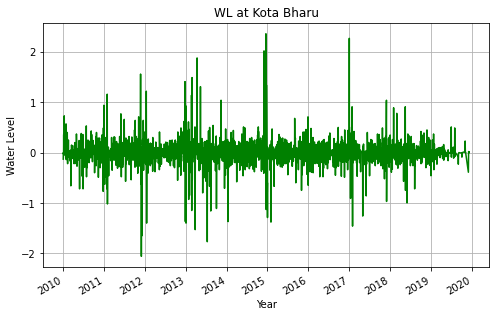

In [8]:
# Plot the time series
# opt for 1st differencing
ax = water_level['first_diff'].plot(color='green', grid=True, figsize=(8,5))
ax.set_xlabel('Year')
ax.set_ylabel('Water Level')
ax.set_title('WL at Kota Bharu')

<AxesSubplot:ylabel='Density'>

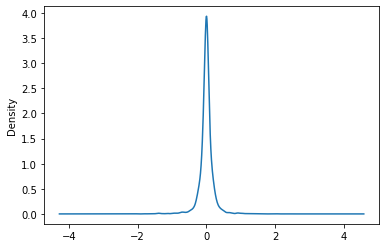

In [9]:
# Plot kernel density plot
water_level['first_diff'].plot(kind='kde')

In [10]:
df_wl = water_level[['first_diff']]
df_wl.head()

,first_diff
Date,
2010-04-01,-0.02
2010-05-01,0.03
2010-06-01,0.01
2010-07-01,-0.05
2010-08-01,0.01


            first_diff
Date                  
2010-04-01       -0.02
2010-05-01        0.03
2010-06-01        0.01
2010-07-01       -0.05
2010-08-01        0.01


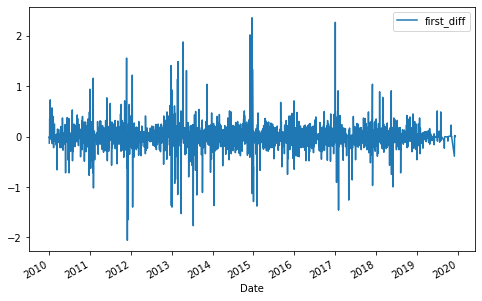

In [11]:
# display first few rows
print(df_wl.head(5))
# line plot of dataset
df_wl.plot(figsize=(8,5))
pyplot.show()

The plot shows that seasonality and trend were removed from the series through differencing. Above is the plot of the differenced data.



In [12]:
df_wl.describe()

,first_diff
count,3496.000000
mean,-0.000014
std,0.224430
min,-2.060000
25%,-0.060000
50%,0.000000
75%,0.060000
max,2.360000


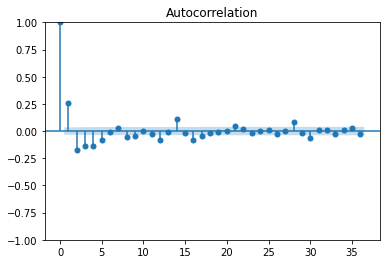

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
# Check for autocorrelation of each lagged observation and whether it is statistically significant.
plot_acf(df_wl)
pyplot.show()

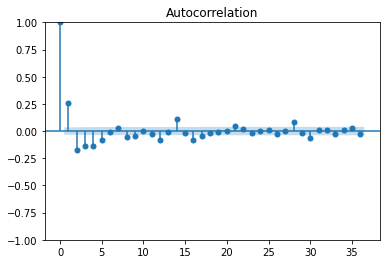

In [14]:
#autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
# Check for autocorrelation of each lagged observation and whether it is statistically significant.
plot_acf(df_wl)
pyplot.show()

The blue shaded region is the margin of uncertainty. Candlesticks that extend out beyond the blue shaded region are considered statistically significant. Correlation values are between 1 and -1.

## Create lagged variables

In [15]:
# create lagged variables
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
wl1 = DataFrame()
print(wl1)

Empty DataFrame
Columns: []
Index: []


In [16]:
# Create 12 months of lag values to predict current observation
# Shift of 12 months
for i in range(12,0,-1):
    wl1[['t-'+str(i)]] = df_wl.shift(i)
print(wl1)

            t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
Date                                                                           
2010-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2010-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2010-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.02   
2010-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.02  0.03   
2010-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.02  0.03  0.01   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2019-07-27  0.00 -0.01  0.00  0.00  0.11 -0.01  0.00 -0.11  0.04  0.00 -0.02   
2019-07-28 -0.01  0.00  0.00  0.11 -0.01  0.00 -0.11  0.04  0.00 -0.02 -0.03   
2019-07-29  0.00  0.00  0.11 -0.01  0.00 -0.11  0.04  0.00 -0.02 -0.03  0.07   
2019-07-30  0.00  0.11 -0.01  0.00 -0.11  0.04  0.00 -0.02 -0.03  0.07 -0.01   
2019-07-31  0.11 -0.01  0.00 -0.11  0.04

In [17]:
# Create column t
wl1['t'] = df_wl.values
print(wl1.head(13))

            t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
Date                                                                           
2010-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2010-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2010-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.02   
2010-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.02  0.03   
2010-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.02  0.03  0.01   
2010-09-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.02  0.03  0.01 -0.05   
2010-10-01   NaN   NaN   NaN   NaN   NaN   NaN -0.02  0.03  0.01 -0.05  0.01   
2010-11-01   NaN   NaN   NaN   NaN   NaN -0.02  0.03  0.01 -0.05  0.01  0.01   
2010-12-01   NaN   NaN   NaN   NaN -0.02  0.03  0.01 -0.05  0.01  0.01  0.00   
2010-01-13   NaN   NaN   NaN -0.02  0.03  0.01 -0.05  0.01  0.01  0.00 -0.01   
2010-01-14   NaN   NaN -0.02  0.03  0.01

In [18]:
# Create a new subsetted dataframe, removing Nans from first 12 rows
wl1_kb = wl1[13:]
print(wl1_kb)

            t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
Date                                                                           
2010-01-17  0.03  0.01 -0.05  0.01  0.01  0.00 -0.01  0.00 -0.04  0.02 -0.01   
2010-01-18  0.01 -0.05  0.01  0.01  0.00 -0.01  0.00 -0.04  0.02 -0.01 -0.02   
2010-01-19 -0.05  0.01  0.01  0.00 -0.01  0.00 -0.04  0.02 -0.01 -0.02 -0.01   
2010-01-20  0.01  0.01  0.00 -0.01  0.00 -0.04  0.02 -0.01 -0.02 -0.01  0.00   
2010-01-21  0.01  0.00 -0.01  0.00 -0.04  0.02 -0.01 -0.02 -0.01  0.00 -0.05   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2019-07-27  0.00 -0.01  0.00  0.00  0.11 -0.01  0.00 -0.11  0.04  0.00 -0.02   
2019-07-28 -0.01  0.00  0.00  0.11 -0.01  0.00 -0.11  0.04  0.00 -0.02 -0.03   
2019-07-29  0.00  0.00  0.11 -0.01  0.00 -0.11  0.04  0.00 -0.02 -0.03  0.07   
2019-07-30  0.00  0.11 -0.01  0.00 -0.11  0.04  0.00 -0.02 -0.03  0.07 -0.01   
2019-07-31  0.11 -0.01  0.00 -0.11  0.04

In [19]:
# save to new file
wl1_kb.to_csv('waterlevel_lags_12months_features.csv', index=False)